In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [3]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


# Exploratory Data Analysis

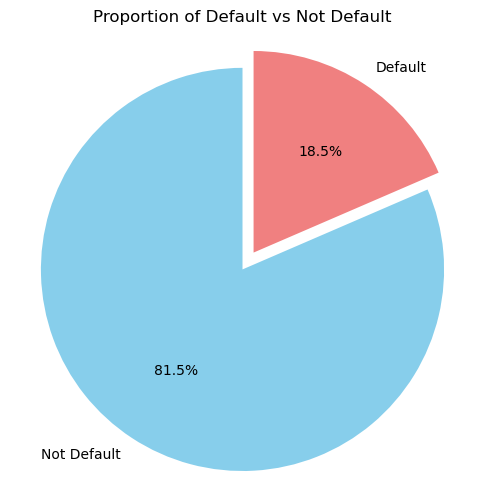

In [10]:
import matplotlib.pyplot as plt

# Count occurrences of each class
default_counts = df['default'].value_counts()
labels = ['Not Default', 'Default']
colors = ['skyblue', 'lightcoral']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.1])
plt.title('Proportion of Default vs Not Default')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: xlabel='fico_score', ylabel='Count'>

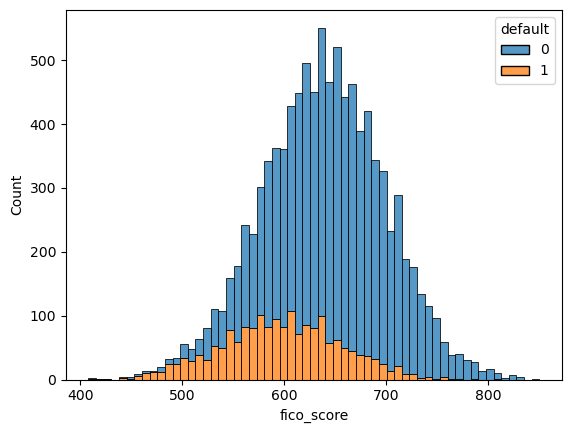

In [22]:
import seaborn as sns

sns.histplot(data=df, x="fico_score", hue="default", multiple="stack")


<Axes: xlabel='default', ylabel='income'>

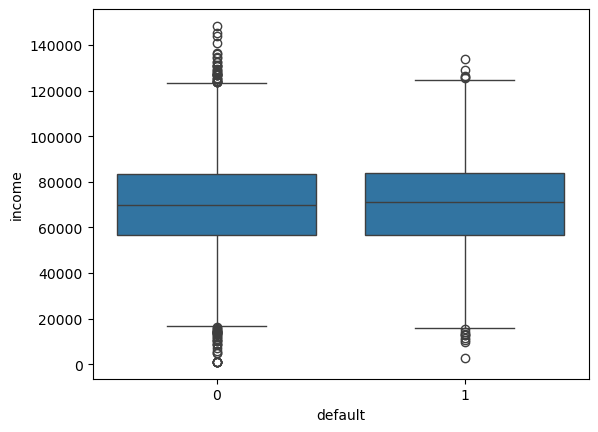

In [18]:
import seaborn as sns
sns.boxplot(x="default", y="income", data=df)



<Axes: >

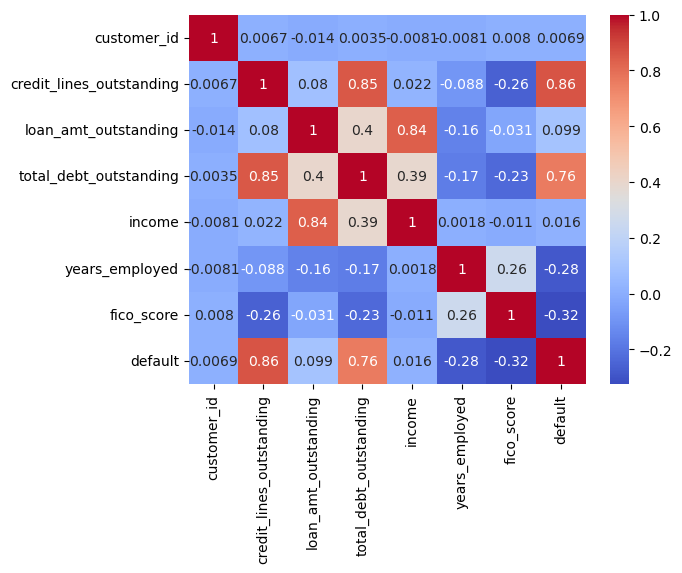

In [20]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Defining Functions

In [52]:
# data_pipeline.py
import pandas as pd
from sklearn.preprocessing import StandardScaler

def load_data(path):
    df = pd.read_csv(path)
    return df

def feature_engineering(df):
    df['debt_to_income']= df['total_debt_outstanding']/df['income']
    df['loan_to_income']= df['loan_amt_outstanding']/df['income']
    df['avg_loan_per_line']= df['loan_amt_outstanding']/(df['credit_lines_outstanding']+1)

def preprocess_features(df):
    features = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding',
                'income', 'years_employed', 'fico_score',
                'debt_to_income', 'loan_to_income', 'avg_loan_per_line']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, df['default'], scaler

In [54]:
load_data('Task 3 and 4_Loan_Data.csv')

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [56]:
feature_engineering(df)

In [58]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income,loan_to_income,avg_loan_per_line
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173,0.066909,5221.545193
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789,0.073510,326.488121
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787,0.051058,3363.009259
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645,0.064105,4766.648001
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435,0.057395,672.913859


In [60]:
preprocess_features(df)

(array([[-0.83795996,  0.74709578, -0.72484779, ..., -0.89186761,
          0.70342997,  1.57330171],
        [ 2.02940918, -1.54837469, -0.07396659, ...,  2.23158769,
          1.32371209, -1.3088511 ],
        [-0.83795996, -0.56050945, -1.00969582, ..., -1.12600486,
         -0.7860878 ,  0.47901732],
        ...,
        [ 0.3089877 , -0.75383958, -0.58939551, ...,  0.02419504,
          2.01428137, -0.89498008],
        [-0.83795996, -0.61264913, -1.15829336, ..., -1.25047124,
          0.48435236,  0.43538363],
        [-0.26448613, -1.57741531, -0.85541136, ..., -0.29438525,
          0.30270039, -0.93653775]]),
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: default, Length: 10000, dtype: int64,
 StandardScaler())

In [62]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income,loan_to_income,avg_loan_per_line
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173,0.066909,5221.545193
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789,0.073510,326.488121
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787,0.051058,3363.009259
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645,0.064105,4766.648001
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435,0.057395,672.913859


In [64]:
# 📁 train_model.py
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
import joblib

def train_model(X, y):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Train Logistic Regression with class weights and calibration
    base_model = LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear', random_state=42)
    calibrated_model = CalibratedClassifierCV(base_model, cv=5)
    calibrated_model.fit(X_train_res, y_train_res)

    # Evaluate
    y_proba = calibrated_model.predict_proba(X_test)[:, 1]
    y_pred = calibrated_model.predict(X_test)

    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return calibrated_model

def save_model(model, path='model.pkl'):
    joblib.dump(model, path)

# Optional: load function
# def load_model(path='model.pkl'):
#     return joblib.load(path)


In [66]:
X = df.drop(['default', 'customer_id'], axis=1)
y = df['default']

train_model(X, y)

AUC Score: 0.9979224009285359
Precision: 0.8985148514851485
Recall: 0.981081081081081
Confusion Matrix:
 [[1589   41]
 [   7  363]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1630
           1       0.90      0.98      0.94       370

    accuracy                           0.98      2000
   macro avg       0.95      0.98      0.96      2000
weighted avg       0.98      0.98      0.98      2000



CalibratedClassifierCV(cv=5,
                       estimator=LogisticRegression(C=0.1,
                                                    class_weight='balanced',
                                                    random_state=42,
                                                    solver='liblinear'))

In [68]:
# 📁 utils.py
def expected_loss(pd_score, loan_amount, lgd=0.9):
    """
    Calculate expected loss for a loan.
    EL = PD × LGD × Loan Amount
    """
    return pd_score * lgd * loan_amount

def assign_risk_band(pd_score):
    """    Classify borrower into risk band based on predicted PD.
    Thresholds:
        - Low: < 0.3
        - Medium: 0.3 to < 0.7
        - High: >= 0.7
    """
    if pd_score < 0.3:
        return "Low"
    elif pd_score < 0.7:
        return "Medium"
    else:
        return "High"


In [72]:
df['predicted_proba'] = calibrated_model.predict_proba(X)[:, 1]


# Assign risk bands
df['risk_band'] = df['predicted_proba'].apply(assign_risk_band)

# Calculate expected loss
df['expected_loss'] = df.apply(lambda row: expected_loss(row['predicted_proba'], row['loan_amt_outstanding']), axis=1)


In [78]:
# 📁 app.py
import streamlit as st
import joblib
import pandas as pd
from utils import expected_loss, assign_risk_band

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Loan Default Risk Predictor", layout="centered")
st.title("🔍 Loan Default Risk Predictor")
st.markdown("Predict default probability, risk band, and expected loss for a borrower.")

# Input fields
income = st.number_input("Annual Income (₹)", min_value=10000, max_value=10000000, step=10000)
loan_amt = st.number_input("Loan Amount Outstanding (₹)", min_value=1000, max_value=5000000, step=1000)
total_debt = st.number_input("Total Debt Outstanding (₹)", min_value=1000, max_value=10000000, step=1000)
credit_lines = st.number_input("Credit Lines Outstanding", min_value=0, max_value=20, step=1)
years_employed = st.slider("Years Employed", min_value=0, max_value=40, value=5)
fico_score = st.slider("FICO Score", min_value=300, max_value=850, value=650)

if st.button("Predict Risk"):
    # Feature engineering
    debt_to_income = total_debt / income
    loan_to_income = loan_amt / income
    avg_loan_per_line = loan_amt / (credit_lines + 1)

    # Build input DataFrame
    input_data = pd.DataFrame({
        'credit_lines_outstanding': [credit_lines],
        'loan_amt_outstanding': [loan_amt],
        'total_debt_outstanding': [total_debt],
        'income': [income],
        'years_employed': [years_employed],
        'fico_score': [fico_score],
        'debt_to_income': [debt_to_income],
        'loan_to_income': [loan_to_income],
        'avg_loan_per_line': [avg_loan_per_line]
    })

    # Preprocess
    input_scaled = scaler.transform(input_data)

    # Predict
    pd_score = model.predict_proba(input_scaled)[0][1]
    risk_band = assign_risk_band(pd_score)
    eloss = expected_loss(pd_score, loan_amt)

    # Output
    st.success(f"**Predicted Default Probability:** {pd_score:.2%}")
    st.info(f"**Risk Category:** {risk_band}")
    st.warning(f"**Expected Loss:** ₹{eloss:,.0f}")


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [1]:
import pandas as pd

df = pd.read_csv("data/loans.csv")
df['loan_to_income'] = df['loan_amt_outstanding'] / df['income']

# Group by default
print(df.groupby('default')['fico_score'].describe())
print(df.groupby('default')['loan_to_income'].describe())
print(df.groupby('default')['income'].describe())


          count        mean        std    min    25%    50%    75%    max
default                                                                  
0        8149.0  646.938765  57.015049  408.0  609.0  647.0  685.0  850.0
1        1851.0  596.257699  58.949929  409.0  557.0  597.0  636.5  810.0
          count      mean       std       min       25%       50%       75%  \
default                                                                       
0        8149.0  0.058597  0.010543  0.012249  0.051424  0.058665  0.065877   
1        1851.0  0.063059  0.010312  0.025994  0.056178  0.063070  0.070003   

              max  
default            
0        0.102103  
1        0.094888  
          count          mean           std          min          25%  \
default                                                                 
0        8149.0  69883.889804  20003.433022  1000.000000  56541.96260   
1        1851.0  70726.740140  20363.512385  2836.241899  56538.39748   

              

In [3]:
df['loan_amt_outstanding'].describe()

count    10000.000000
mean      4159.677034
std       1421.399078
min         46.783973
25%       3154.235371
50%       4052.377228
75%       5052.898103
max      10750.677810
Name: loan_amt_outstanding, dtype: float64

In [5]:
df['income'].describe()

count     10000.000000
mean      70039.901401
std       20072.214143
min        1000.000000
25%       56539.867903
50%       70085.826330
75%       83429.166133
max      148412.180500
Name: income, dtype: float64